In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.pipeline import Pipeline
#to data preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
#NLP tools
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

#train split and fit models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from nltk.tokenize import TweetTokenizer

from sklearn.svm import SVC
#model selection
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [2]:
# Load data
df = pd.read_csv('hate-by-Kabada.csv',delimiter = ';', names=['Text','label'],encoding="utf-8")
#,count,hate_speech,offensive_language,neither,class,tweet
# Preprocess data

In [3]:
df = df.dropna()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10036 entries, 0 to 10036
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    10036 non-null  object
 1   label   10036 non-null  object
dtypes: object(2)
memory usage: 235.2+ KB


In [5]:
df.describe().T

,count,unique,top,freq
Text,10036,9860,abiy ajjeefamuu qaba,4
label,10036,5,politics,3991


In [6]:
dt_transformed = df[['Text', 'label']]

In [7]:
x = df['Text']

In [8]:
y = df['label']

In [9]:
dt_transformed

,Text,label
0,Namni waan itti kenname hojjechuuf gahumsa hin...,offensive
1,ANI TPLF DEGEERA EEGA YOO AFUUFTUN KUN HUNDI P...,politics
2,Bara Kana bittaa boondii fi arjooma garaagaraa...,free
3,Akka Aadde Adaanach jedhanitti Sagantaan maall...,free
4,afaa isin abbaan page kana maqaa hinjirre ykn ...,politics
...,...,...
10032,Namoonni kun bineensa fucking yoomiyyuu hin ji...,religion
10033,Qur'aana keessatti ifatti barreeffame jira Nam...,religion
10034,"Deeggarsa Chaayinaa irraa , amantii kaansarii ...",religion
10035,Muslimoonni waraana barbaadu! Kanaaf dursa gar...,religion


In [10]:
#dt_transformed = dt_transformed['label']

In [11]:
# Dividindo o df em treino e teste
#df_train, df_test = train_test_split(dt_transformed, test_size = 0.10, random_state = 42, stratify=dt_transformed)
#df_train.shape, df_test.shape

In [12]:
dt_transformed.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Text,label'>

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 157 (\x9d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


RuntimeError: In draw_glyphs_to_bitmap: Could not convert glyph to bitmap (error code 0x62)

<Figure size 432x288 with 1 Axes>

In [13]:
def preprocessing(data):
    stemmer = nltk.stem.RSLPStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    corpus = []
    for tweet in data:
        review = re.sub(r"@[A-Za-z0-9_]+", " ", tweet)
        review = re.sub('RT', ' ', review)
        review = re.sub(r"https?://[A-Za-z0-9./]+", " ", review)
        review = re.sub(r"https?", " ", review)
        review = re.sub('[^a-zA-Z]', ' ', review)
        review = review.lower()
        review = review.split()
        ps = PorterStemmer()
        review = [ps.stem(word) for word in review if not word in set(all_stopwords) if len(word) > 2]
        review = ' '.join(review)
        corpus.append(review)
    return np.array(corpus)

In [14]:
 nltk.download('rslp')

[nltk_data] Error loading rslp: <urlopen error [WinError 10054] An
[nltk_data]     existing connection was forcibly closed by the remote
[nltk_data]     host>


False

In [15]:
corpus = preprocessing(x.values)
corpus.shape

(10036,)

In [16]:
corpus.shape

(10036,)

In [17]:
y.shape

(10036,)

In [18]:
# treino e validação do corpus
c_train, c_vad, y_train, y_vad = train_test_split(corpus, y, test_size = 0.10, random_state = 42)
c_train.shape, c_vad.shape

((9032,), (1004,))

In [19]:
def tokenize(c_train, c_vad):
    tweet_tokenizer = TweetTokenizer() 
    vectorizer = CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize, max_features = 1010)
    X_train = vectorizer.fit_transform(c_train).toarray()
    X_vad = vectorizer.transform(c_vad).toarray()
    return X_train, X_vad

In [22]:
X_train, X_vad = tokenize(c_train, c_vad)
X_train.shape, X_vad.shape

((9032, 1010), (1004, 1010))

In [23]:
# Define SVM model
#model_svm = SVC(kernel='linear')

In [25]:
# Logistic Regression
#model = LogisticRegression(multi_class='ovr', solver='liblinear', random_state = 0)
# Define SVM model
model = SVC(kernel='linear')
model.fit(X_train, y_train.ravel())
y_pred = model.predict(X_vad)

In [26]:
def set_confusion_matrix(clf, X, y, title):
    plot_confusion_matrix(clf, X, y)
    plt.title(title)
    plt.show()

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay

In [32]:
 from sklearn.metrics import classification_report

In [33]:
target_names = ['class 0', 'class 1', 'class 2','class 3', 'class 4']

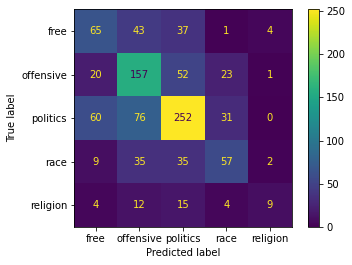

In [34]:
predictions = model.predict(X_vad)
cm = confusion_matrix(y_vad, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [35]:
target_names = ['free', 'offensive', 'politics','race', 'religion']
print(classification_report(y_vad, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        free       0.41      0.43      0.42       150
   offensive       0.49      0.62      0.55       253
    politics       0.64      0.60      0.62       419
        race       0.49      0.41      0.45       138
    religion       0.56      0.20      0.30        44

    accuracy                           0.54      1004
   macro avg       0.52      0.45      0.47      1004
weighted avg       0.55      0.54      0.53      1004

